**Relax Challenge:**<p>
Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.
We suggest spending 1­2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better ­­ no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [62]:
#Import Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [63]:
#Load data
df_eng = pd.read_csv('takehome_user_engagement.csv')
df_user = pd.read_csv('takehome_users.csv', encoding= 'ISO-8859-1')

In [64]:
#View Data_1
df_eng.head()

time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1

In [65]:
#View Data_2
df_user.head()

object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  
0             10803.0  
1               316.0  
2              1525.0  
3              5151.0  
4              5240.0

In [66]:
#Info data_1
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [67]:
#Info data_2
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [68]:
#Convert date object to date time format:
df_eng['time_stamp'] = pd.to_datetime(df_eng['time_stamp'])
df_user['creation_time'] = pd.to_datetime(df_user['creation_time'])

In [69]:
#Fill missing values in df_user with median:
df_user['last_session_creation_time'] = df_user['last_session_creation_time'].fillna(df_user['last_session_creation_time'].median())
df_user['invited_by_user_id'] = df_user['invited_by_user_id'].fillna(df_user['invited_by_user_id'].median())

Yearly visit Count:
 year
2013    105725
2014     90337
2012     11855
Name: visited, dtype: int64


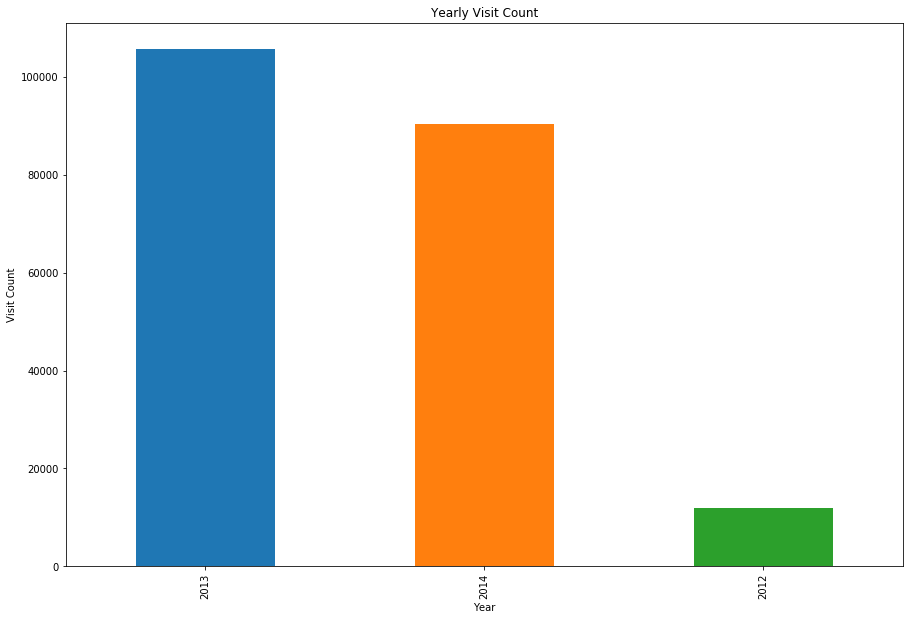

In [70]:
#Create new columns for Year and Week from time_stamp:
df_eng['year']=df_eng['time_stamp'].dt.year
df_eng['week']=df_eng['time_stamp'].dt.week
print('Yearly visit Count:\n',df_eng.groupby('year')['visited'].count().sort_values(ascending = False))

#Plot
df_eng.groupby('year')['visited'].count().sort_values(ascending = False).plot.bar(figsize = (15,10))
_ = plt.xlabel('Year')
_ = plt.ylabel('Visit Count')
_ = plt.title('Yearly Visit Count')

In [71]:
#Weekly visit counts:
df_eng_new=pd.DataFrame(df_eng.groupby(['user_id', 'week', 'year'])['visited'].count())

In [72]:
#Creating column Adopted_user: Weekly Visits greater than 2 per week
df_eng_new['adopted_user'] = (df_eng_new['visited']>2)*1

In [74]:
#View new table:
df_eng_new.head()

visited  adopted_user
user_id week year                       
1       17   2014        1             0
2       1    2013        1             0
        2    2014        1             0
        6    2014        3             1
        7    2014        2             0

In [75]:
#Merge two data tables:
df_merge = pd.merge(left = df_user, right = df_eng_new, left_on = 'object_id', right_on='user_id', how = 'inner')

In [76]:
#View Merged data: 
df_merge.head()

object_id       creation_time            name                     email  \
0          1 2014-04-22 03:53:30  Clausen August  AugustCClausen@yahoo.com   
1          2 2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   
2          2 2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   
3          2 2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   
4          2 2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   

  creation_source  last_session_creation_time  opted_in_to_mailing_list  \
0    GUEST_INVITE                1.398139e+09                         1   
1      ORG_INVITE                1.396238e+09                         0   
2      ORG_INVITE                1.396238e+09                         0   
3      ORG_INVITE                1.396238e+09                         0   
4      ORG_INVITE                1.396238e+09                         0   

   enabled_for_marketing_drip  org_id  invited_by_user_id  visited  \
0                           0      11             10803.0        1   
1                           0       1               316.0        1   
2                           0       1               316.0        1   
3                           0       1               316.0        3   
4                           0       1               316.0        2   

   adopted_user  
0             0  
1             0  
2             0  
3             1  
4             0

In [77]:
#Find adopters_user status by year: 
df_merge['year']=df_merge['creation_time'].dt.year 

In [78]:
#Yearly Count of various transactional activities: 
yearly_adopted_non_adopted_count= df_merge.groupby(['adopted_user', 'year'])[['org_id','creation_source','opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited_by_user_id']].count()
#_ = plt.legend(loc = 'upper right', bbox_to_anchor = (1.3,1))
yearly_adopted_non_adopted_count.unstack()

org_id              creation_source               \
year           2012   2013  2014            2012   2013  2014   
adopted_user                                                    
0             11432  18750  5279           11432  18750  5279   
1             18936  14207   673           18936  14207   673   

             opted_in_to_mailing_list              enabled_for_marketing_drip  \
year                             2012   2013  2014                       2012   
adopted_user                                                                    
0                               11432  18750  5279                      11432   
1                               18936  14207   673                      18936   

                          invited_by_user_id               
year           2013  2014               2012   2013  2014  
adopted_user                                               
0             18750  5279              11432  18750  5279  
1             14207   673              18936  14207   673

#### Visualize Transactional Activities: 

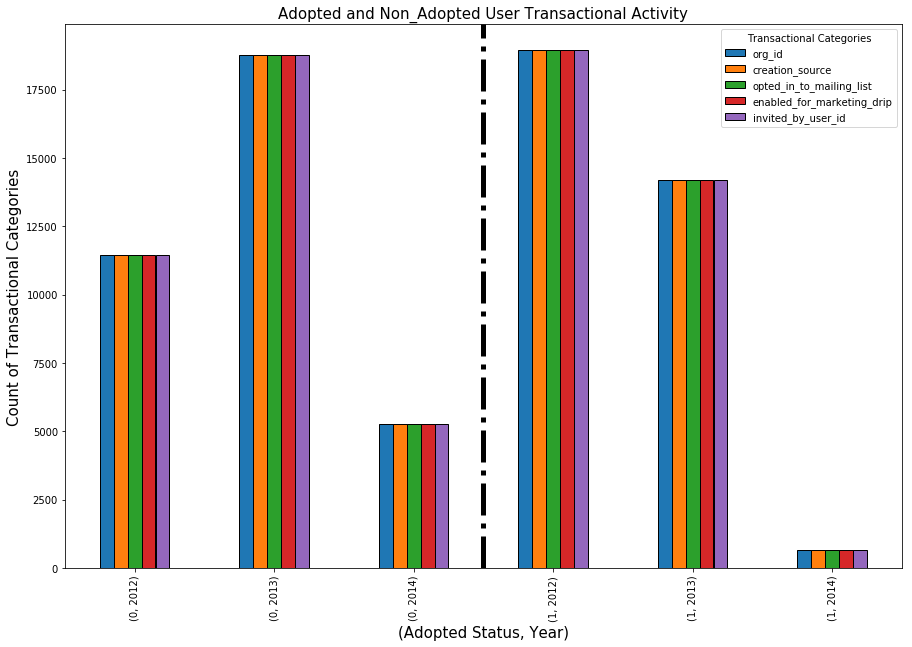

In [79]:
#Data Visualization of Transactional Activities: 
yearly_adopted_non_adopted_count.plot.bar(figsize = (15,10), edgecolor = 'black')
_ = plt.ylabel('Count of Transactional Categories', fontsize = 15)
_ = plt.xlabel('(Adopted Status, Year)', fontsize = 15)
_ = plt.title('Adopted and Non_Adopted User Transactional Activity', fontsize = 15)
_ = plt.legend(title = 'Transactional Categories')
_ = plt.axvline(x=2.5, color='black', linestyle='-.', linewidth = 5)

#### Observation: 


1. Adopted users had maximum transactional history in 2012. 
2. Non-adopted users had maximum transactional history in 2013. 
3. Beyond 2013, there is a significant drop in adopted users than non-adopted users. 

#### What could be the reason for this trend in transactional history?

/Users/prashantsanghal/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


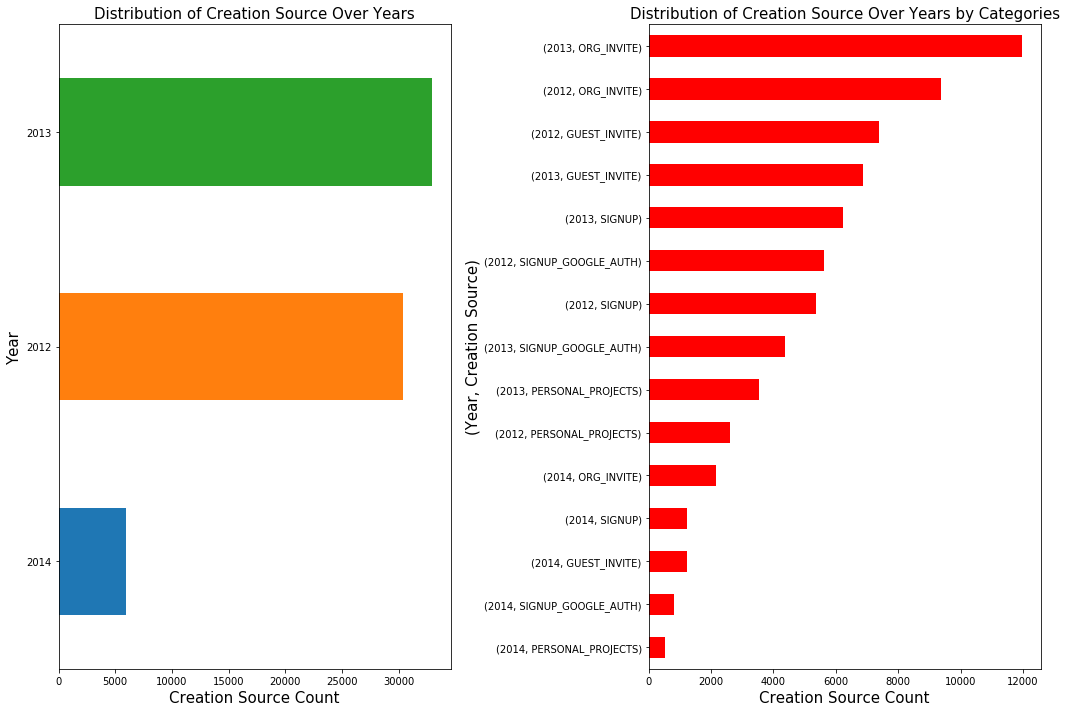

In [80]:
#Plot Trend:
_ = plt.subplot(1,2,1)
df_merge.groupby(['year'])['creation_source'].count().sort_values(ascending = True).plot.barh(figsize = (15,10))
_ = plt.xlabel('Creation Source Count', fontsize = 15)
_ = plt.ylabel('Year', fontsize = 15)
_ = plt.title('Distribution of Creation Source Over Years', fontsize = 15)
_ = plt.subplot(1,2,2)
df_merge.groupby(['year'])['creation_source'].value_counts().sort_values( ascending = True).plot.barh(figsize = (15,10), color = 'red')
_ = plt.xlabel('Creation Source Count', fontsize = 15)
_ = plt.ylabel('(Year, Creation Source)', fontsize = 15)
_ = plt.title('Distribution of Creation Source Over Years by Categories', fontsize = 15)
_ = plt.subplot(1,2,2)
_ = plt.tight_layout()

#### Observation: 
1. 2012: Creation source started very well. 
2. 2013: Creation source grew more than 2012.
3. 2014: Demand suddenly reduced, might signal new entrant in the space. 

#### Identify Important features for predicting Adopted Users: 

In [21]:
df_merge.head()

object_id       creation_time            name                     email  \
0          1 2014-04-22 03:53:30  Clausen August  AugustCClausen@yahoo.com   
1          2 2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   
2          2 2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   
3          2 2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   
4          2 2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   

  creation_source  last_session_creation_time  opted_in_to_mailing_list  \
0    GUEST_INVITE                1.398139e+09                         1   
1      ORG_INVITE                1.396238e+09                         0   
2      ORG_INVITE                1.396238e+09                         0   
3      ORG_INVITE                1.396238e+09                         0   
4      ORG_INVITE                1.396238e+09                         0   

   enabled_for_marketing_drip  org_id  invited_by_user_id  visited  \
0                           0      11             10803.0        1   
1                           0       1               316.0        1   
2                           0       1               316.0        1   
3                           0       1               316.0        3   
4                           0       1               316.0        2   

   adopted_user  year  
0             0  2014  
1             0  2013  
2             0  2013  
3             1  2013  
4             0  2013

In [22]:
#Drop Columns: 
col_drop = ['creation_time', 'name', 'email', 'invited_by_user_id', 'visited','year']

df_drop=df_merge.drop(columns = col_drop, axis =1).set_index('object_id')

In [23]:
df_model = pd.get_dummies(data =df_drop, columns = ['creation_source'], drop_first=True)
df_model = pd.get_dummies(data =df_drop, columns = ['creation_source'], drop_first=True)

df_model.head()

last_session_creation_time  opted_in_to_mailing_list  \
object_id                                                         
1                        1.398139e+09                         1   
2                        1.396238e+09                         0   
2                        1.396238e+09                         0   
2                        1.396238e+09                         0   
2                        1.396238e+09                         0   

           enabled_for_marketing_drip  org_id  adopted_user  \
object_id                                                     
1                                   0      11             0   
2                                   0       1             0   
2                                   0       1             0   
2                                   0       1             1   
2                                   0       1             0   

           creation_source_ORG_INVITE  creation_source_PERSONAL_PROJECTS  \
object_id                                                                  
1                                   0                                  0   
2                                   1                                  0   
2                                   1                                  0   
2                                   1                                  0   
2                                   1                                  0   

           creation_source_SIGNUP  creation_source_SIGNUP_GOOGLE_AUTH  
object_id                                                              
1                               0                                   0  
2                               0                                   0  
2                               0                                   0  
2                               0                                   0  
2                               0                                   0

#### Apply Random Forest to find Feature Importance

In [24]:
#Import Package: 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Features:
X = df_model.drop('adopted_user', axis =1)

#Label:
y = df_model['adopted_user']

#Split training and test date 80/20:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12)

In [25]:
#See shape of data:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(55421, 8) (13856, 8) (55421,) (13856,)


#### Modeling: 

In [26]:
#Initiate Random Forest:
rf = RandomForestClassifier(n_estimators=200,  #Changing default parameters
                            max_depth=5,
                            max_features=3,
                            max_leaf_nodes= 2,
                            random_state=12)

#Fit: 
rf.fit(X_train, y_train)

#Predict
y_pred_rf = rf.predict(X_test)

In [35]:
#Identify Feature Importance: 
feature_importance= pd.DataFrame(list(zip(df_model.columns,rf.feature_importances_)), columns = ['Columns', 'Feature_Importance'])
feature_importance = feature_importance.set_index('Columns').sort_values('Feature_Importance', ascending = False)
print(feature_importance)
print('Top 4 Important Features:', feature_importance['Feature_Importance'].head(4).sum()*100, '%')

                                   Feature_Importance
Columns                                              
last_session_creation_time                      0.380
org_id                                          0.245
creation_source_SIGNUP                          0.160
creation_source_PERSONAL_PROJECTS               0.120
enabled_for_marketing_drip                      0.070
adopted_user                                    0.025
opted_in_to_mailing_list                        0.000
creation_source_ORG_INVITE                      0.000
Top 4 Important Features: 90.5 %


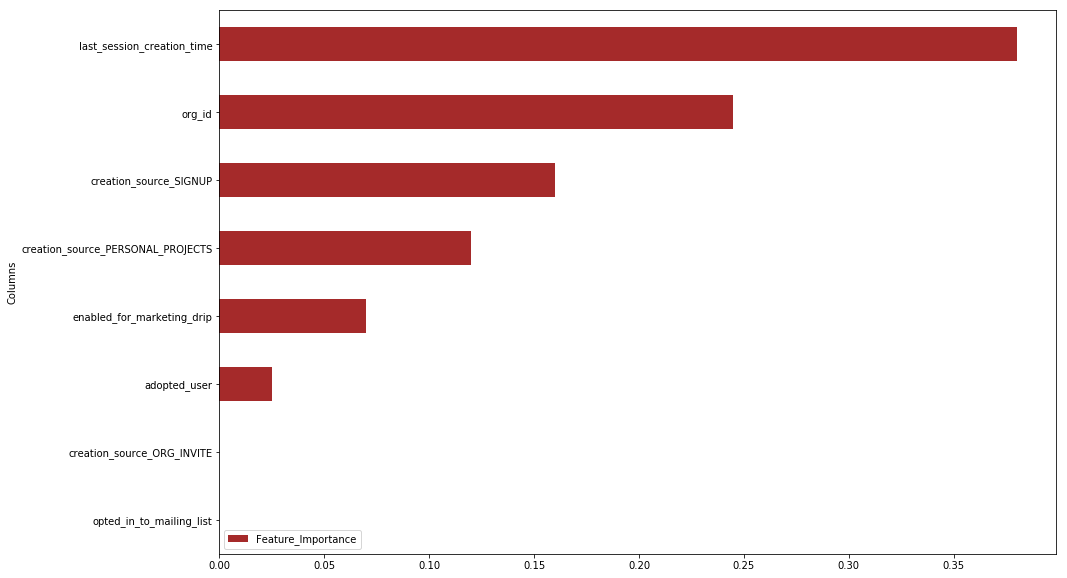

In [34]:
#Plot Feature Importance:

feature_importance.sort_values('Feature_Importance', ascending = True).plot.barh(color ='brown', figsize = (15,10))

#### Observation
1. Top 4 important features can contribute in predicting adopted_users by 90.5%.